# Review Classification - Smartphone

In [1]:
#import the dataset
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')
pd.set_option('Display.max_columns',None)
pd.set_option('Display.max_rows',None)

df=pd.read_csv("Smartphone Rating.csv")
df.head()

,Unnamed: 0,Rating,Heading,Review,Product
0,0,5.0,Simply awesome,Phone is awesome no problem full paisa wasool ...,Smartphone
1,1,5.0,Perfect product!,Same As Expected From Moto! This is the Best v...,Smartphone
2,2,5.0,Awesome,Good value for money phone. Best past is this ...,Smartphone
3,3,NaN,NaN,NaN,Smartphone
4,4,NaN,NaN,NaN,Smartphone


#### Observations:
* The feature unnamed is index. Hence we can drop this feature.

In [2]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head()

,Rating,Heading,Review,Product
0,5.0,Simply awesome,Phone is awesome no problem full paisa wasool ...,Smartphone
1,5.0,Perfect product!,Same As Expected From Moto! This is the Best v...,Smartphone
2,5.0,Awesome,Good value for money phone. Best past is this ...,Smartphone
3,NaN,NaN,NaN,Smartphone
4,NaN,NaN,NaN,Smartphone


# Exploratory Data Analysis

In [3]:
#check the dimensions of the data (Headphone)
df.shape

(20080, 4)

#### Observations
* The dataset has 20080 rows and 4 columns
* The dataset has 1 label - 'Rating' and 3 features

In [4]:
#check the names of columns in dataset
df.columns

Index(['Rating', 'Heading', 'Review', 'Product'], dtype='object')

In [5]:
#check the datatype of each feature
df.dtypes

Rating     float64
Heading     object
Review      object
Product     object
dtype: object

#### Observations:
   * All the feratures are of "object" data type.

In [6]:
#checking if there are any null values in the dataset
df.isna().sum()

Rating     1291
Heading    1279
Review     1279
Product       0
dtype: int64

In [7]:
#dropping all numm values
df.dropna(inplace=True)

In [8]:
#cross checking null values
df.isna().sum()

Rating     0
Heading    0
Review     0
Product    0
dtype: int64

In [9]:
df.shape

(18789, 4)

#### Observations:
* There are 18789 rows in the dataset

In [10]:
df['Rating'].value_counts()

5.0    10414
4.0     4458
3.0     1763
1.0     1488
2.0      666
Name: Rating, dtype: int64

#### Observations:
* The ratings are inbalanced. 
* Most of the ratings are 5 star.

In [11]:
#check number of unique values in each class;
df.nunique()

Rating         5
Heading      170
Review     11324
Product        1
dtype: int64

#### Observations:
* The label rating has 5 unique values: 1, 2, 3, 4, 5
* The headings can be duplicate as it is kind of summary of the review.
* The reviews should be unique. Hence, we will drop the duplicate reviews to avoid over-fitting.

In [12]:
df.drop_duplicates(subset='Review', inplace=True)

In [13]:
#cross checking for diplicacy of reviews
print(df.shape)
print(df.nunique())

(11324, 4)
Rating         5
Heading      168
Review     11324
Product        1
dtype: int64


#### Observations:
* We have 11324 unique reviews for laptops
* There are only 168 unique headings in the data set.
* If the classification is to be done based on the heading, then only unique headings must be considered.
* In the model building stage we will classfiy from unique headings as well.

In [14]:
#checking the length of review
df['Review_word_counter']=df['Review'].str.strip().str.len()
df.head()

,Rating,Heading,Review,Product,Review_word_counter
0,5.0,Simply awesome,Phone is awesome no problem full paisa wasool ...,Smartphone,500
1,5.0,Perfect product!,Same As Expected From Moto! This is the Best v...,Smartphone,219
2,5.0,Awesome,Good value for money phone. Best past is this ...,Smartphone,133
12,4.0,Worth the money,This mobile low budget in a good phone .\nGood...,Smartphone,133
13,4.0,Value-for-money,Rear Camera will be better with updates .but t...,Smartphone,398


In [15]:
from sklearn.utils import shuffle
df=shuffle(df)
df.reset_index(inplace=True,drop=True)

In [16]:
df.head()

,Rating,Heading,Review,Product,Review_word_counter
0,4.0,Delightful,Great Budget Smartphone,Smartphone,23
1,1.0,Useless product,Bad battery and charger is slo,Smartphone,30
2,5.0,Great product,Weight must be minimised,Smartphone,24
3,5.0,Fabulous!,Best in money in,Smartphone,16
4,4.0,Good choice,Very good and nice,Smartphone,18


### Exploratory Data Analysis

In [17]:
#check the dimensions of the data
df.shape

(11324, 5)

#### Observtions:
* The dataset has 11324 rows and 4 columns

In [18]:
#check the names of columns in dataset
df.columns

Index(['Rating', 'Heading', 'Review', 'Product', 'Review_word_counter'], dtype='object')

In [19]:
#check the datatype of each feature
df.dtypes

Rating                 float64
Heading                 object
Review                  object
Product                 object
Review_word_counter      int64
dtype: object

#### Observations:
   * There are three columns with "object" data type they are "Heading", "Review" and "Product".
   * There is one column (label) with float data type.

In [20]:
#checking if there are any null values in the dataset
df.isnull().sum()

Rating                 0
Heading                0
Review                 0
Product                0
Review_word_counter    0
dtype: int64

#### Observations:
   * There are no null values in the entire dataset

In [21]:
df['Rating'].value_counts()

5.0    5637
4.0    2562
1.0    1350
3.0    1208
2.0     567
Name: Rating, dtype: int64

#### Observations:
* There are more number of 5 star rated reviews.
* There are very less number of 2 star rated reviews.
* The data set is not perfectly balanced.

In [22]:
#Separation of rating as different labels.
df['1 Star']=df.apply(lambda x: 1 if x['Rating']==1 else 0, axis=1)
df['2 Star']=df.apply(lambda x: 1 if x['Rating']==2 else 0, axis=1)
df['3 Star']=df.apply(lambda x: 1 if x['Rating']==3 else 0, axis=1)
df['4 Star']=df.apply(lambda x: 1 if x['Rating']==4 else 0, axis=1)
df['5 Star']=df.apply(lambda x: 1 if x['Rating']==5 else 0, axis=1)

In [23]:
df.head(20)

,Rating,Heading,Review,Product,Review_word_counter,1 Star,2 Star,3 Star,4 Star,5 Star
0,4.0,Delightful,Great Budget Smartphone,Smartphone,23,0,0,0,1,0
1,1.0,Useless product,Bad battery and charger is slo,Smartphone,30,1,0,0,0,0
2,5.0,Great product,Weight must be minimised,Smartphone,24,0,0,0,0,1
3,5.0,Fabulous!,Best in money in,Smartphone,16,0,0,0,0,1
4,4.0,Good choice,Very good and nice,Smartphone,18,0,0,0,1,0
5,5.0,Awesome,Super phone ameging,Smartphone,19,0,0,0,0,1
6,2.0,Expected a better product,Camera quality is disgusting and the screen li...,Smartphone,59,0,1,0,0,0
7,5.0,Best in the market!,Nice product❤,Smartphone,13,0,0,0,0,1
8,5.0,Terrific,Extremely happy with this product.,Smartphone,34,0,0,0,0,1
9,5.0,Perfect product!,Best moto phone,Smartphone,15,0,0,0,0,1


In [24]:
df.drop(['Rating'], axis=1, inplace= True)

In [25]:
#statistical analysis
df.describe()

,Review_word_counter,1 Star,2 Star,3 Star,4 Star,5 Star
count,11324.000000,11324.000000,11324.000000,11324.000000,11324.000000,11324.000000
mean,81.453020,0.119216,0.050071,0.106676,0.226245,0.497792
std,106.361355,0.324057,0.218100,0.308715,0.418418,0.500017
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,91.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,510.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Observations
 * For all the labels the minimum value is zero and maximum is 1. As there are only binary classes deviations cannot be studied

In [26]:
#checking the skewness
df.skew()

Review_word_counter    2.501052
1 Star                 2.350524
2 Star                 4.126621
3 Star                 2.548589
4 Star                 1.308754
5 Star                 0.008832
dtype: float64

#### observations
* The highest skewness is seen in 2 Star rating

# Visualizations

In [27]:
#import libraries required for visualizations
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

average length of review: 81.5


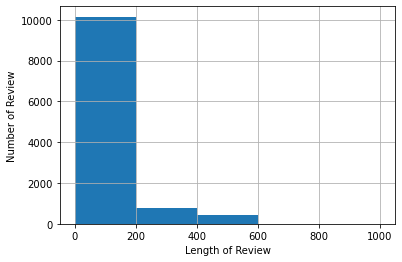

In [28]:
#plotting the average length of reviews
review=df["Review"]
x = [len(review[i]) for i in range(review.shape[0])]

print('average length of review: {:.1f}'.format(sum(x)/len(x)) )
bins = [1,200,400,600,800,1000]
plt.hist(x, bins=bins)
plt.xlabel('Length of Review')
plt.ylabel('Number of Review')       
plt.grid(True)
plt.show()

#### Observations:
* The average length of review is 81.
* Maximum number of reviews had less than 200 words.
* There were no reviews with more than 600 words.
* Comments with 200 and above words were less.

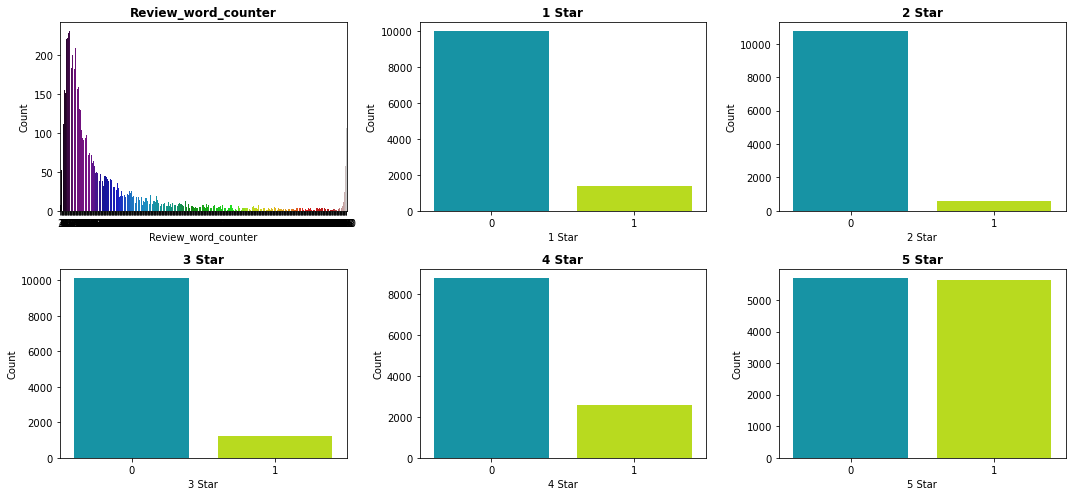

In [29]:
#let us plot countplot of each feature
a = 3  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(15,10))
for cols in df.columns:
    if df[cols].dtypes=='int64':
        plt.subplot(a, b, c)
        plt.title('{}'.format(cols),weight='bold')
        sns.countplot(df[cols],palette='nipy_spectral')
        plt.xticks(rotation=360)
        c = c + 1
        plt.tight_layout()
        plt.ylabel("Count")
plt.show()

#### Obseravtions:
   * Around 50% of the review are rated 5 star.
   * 2 star rated reviews are least in number

In [30]:
print(list(df.columns.values))

['Heading', 'Review', 'Product', 'Review_word_counter', '1 Star', '2 Star', '3 Star', '4 Star', '5 Star']


In [31]:
#make a list of columns
categories = list(df.columns.values)
categories = categories[4:]
print(categories)

['1 Star', '2 Star', '3 Star', '4 Star', '5 Star']


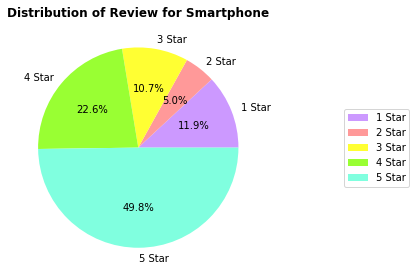

In [32]:
#distribution plot of each type of review
colors=['#cc99ff','#ff9999','#ffff33','#99ff33','#80ffdf'] 
df_distribution = df[categories].sum()

df_distribution.plot.pie(y='count',autopct='%1.1f%%',colors=colors)\
                            .legend(loc='center left', bbox_to_anchor=(1.3, 0.5))
plt.ylabel("")
plt.title("Distribution of Review for Smartphone",fontweight='bold')
plt.tight_layout()
plt.show()

#### Observations:
* 5 Star rating had the highest share of 49.8%, followed by 4 star with 22.6%.
* 2 Star rating has least share with 5%

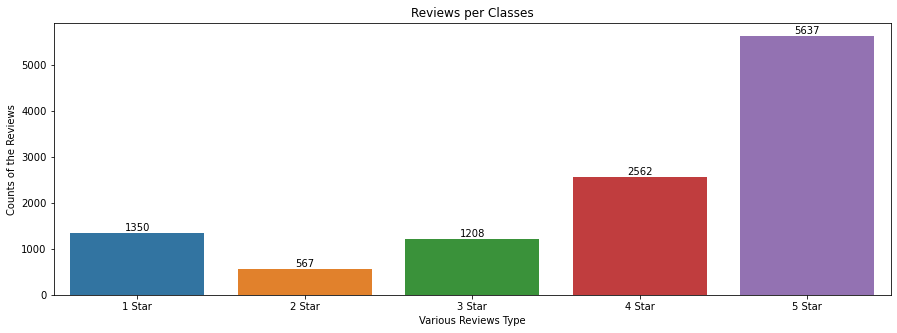

In [33]:
# Checking the count of the various types of reviews
cols = ['1 Star', '2 Star', '3 Star', '4 Star', '5 Star']
val_counts = df[cols].sum()

plt.figure(figsize=(15,5))
ax = sns.barplot(val_counts.index, val_counts.values)

plt.title("Reviews per Classes")
plt.xlabel("Various Reviews Type")
plt.ylabel("Counts of the Reviews")

rects = ax.patches
labels = val_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height+5, label, ha="center", va="bottom")


plt.show()

#### Observations
* There were 5637 5 Star rated reviews which are maximum. 
* 4 Star reviews were second highest with count of 2562
* 2 Star ratings have the least count of only 567.

##  Data Pre-Processing

In [34]:
#convert all text into lowercase 
df['Review'] = df['Review'].str.lower()
df['Heading'] = df['Heading'].str.lower()
#check if the text is lower cased
df.head()

,Heading,Review,Product,Review_word_counter,1 Star,2 Star,3 Star,4 Star,5 Star
0,really nice,this phone comes with decent specifications......,Smartphone,510,0,0,0,1,0
1,worth every penny,best mobile in value of my money thank you fli...,Smartphone,52,0,0,0,0,1
2,worth every penny,awesome product. delivery on time :),Smartphone,36,0,0,0,0,1
3,perfect product!,nice and good service flipkart,Smartphone,30,0,0,0,0,1
4,terrific,overall better mobile phone in this price\npro...,Smartphone,239,0,0,0,0,1


In [35]:
#clean all html tags 
import re
def cleanHtml(sentence):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(sentence))
    return cleantext
#apply the function 
df['Review'] = df['Review'].apply(cleanHtml)
df['Heading'] = df['Heading'].apply(cleanHtml)
df.head()

,Heading,Review,Product,Review_word_counter,1 Star,2 Star,3 Star,4 Star,5 Star
0,really nice,this phone comes with decent specifications......,Smartphone,510,0,0,0,1,0
1,worth every penny,best mobile in value of my money thank you fli...,Smartphone,52,0,0,0,0,1
2,worth every penny,awesome product. delivery on time :),Smartphone,36,0,0,0,0,1
3,perfect product!,nice and good service flipkart,Smartphone,30,0,0,0,0,1
4,terrific,overall better mobile phone in this price\npro...,Smartphone,239,0,0,0,0,1


In [36]:
#remove punctuations
def cleanPunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned
#call the function
df['Review'] = df['Review'].apply(cleanPunc)
df['Heading'] = df['Heading'].apply(cleanPunc)
df.head()

,Heading,Review,Product,Review_word_counter,1 Star,2 Star,3 Star,4 Star,5 Star
0,really nice,this phone comes with decent specifications ...,Smartphone,510,0,0,0,1,0
1,worth every penny,best mobile in value of my money thank you fli...,Smartphone,52,0,0,0,0,1
2,worth every penny,awesome product delivery on time :,Smartphone,36,0,0,0,0,1
3,perfect product,nice and good service flipkart,Smartphone,30,0,0,0,0,1
4,terrific,overall better mobile phone in this price pros...,Smartphone,239,0,0,0,0,1


In [37]:
# any alphabets from small a to small z or capital A to capital Z.
#The plus sign specifies that string should have at least one character.
def keepAlpha(sentence):
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub('[^a-z A-Z]+', ' ', word)
        alpha_sent += alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent
#apply the function
df['Review'] = df['Review'].apply(keepAlpha)
df['Heading'] = df['Heading'].apply(keepAlpha)
df.head()

,Heading,Review,Product,Review_word_counter,1 Star,2 Star,3 Star,4 Star,5 Star
0,really nice,this phone comes with decent specifications an...,Smartphone,510,0,0,0,1,0
1,worth every penny,best mobile in value of my money thank you fli...,Smartphone,52,0,0,0,0,1
2,worth every penny,awesome product delivery on time,Smartphone,36,0,0,0,0,1
3,perfect product,nice and good service flipkart,Smartphone,30,0,0,0,0,1
4,terrific,overall better mobile phone in this price pros...,Smartphone,239,0,0,0,0,1


In [38]:
#import libraries for stemming and stopwords removal
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re

In [39]:
#removing stopwords
stop_words = set(stopwords.words('english'))
re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)
def removeStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub(" ", sentence)
#apply the remove_stopwords function
df['Review'] = df['Review'].apply(removeStopWords)
df['Heading'] = df['Heading'].apply(removeStopWords)
df.head()

,Heading,Review,Product,Review_word_counter,1 Star,2 Star,3 Star,4 Star,5 Star
0,really nice,phone comes decent specifications audio ou...,Smartphone,510,0,0,0,1,0
1,worth every penny,best mobile value money thank flip cart,Smartphone,52,0,0,0,0,1
2,worth every penny,awesome product delivery time,Smartphone,36,0,0,0,0,1
3,perfect product,nice good service flipkart,Smartphone,30,0,0,0,0,1
4,terrific,overall better mobile phone price pros perfo...,Smartphone,239,0,0,0,0,1


In [40]:
#stemming
stemmer = SnowballStemmer("english")
def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence

df['Review'] = df['Review'].apply(stemming)
df['Heading'] = df['Heading'].apply(stemming)
df.head()

,Heading,Review,Product,Review_word_counter,1 Star,2 Star,3 Star,4 Star,5 Star
0,realli nice,phone come decent specif audio output pretti g...,Smartphone,510,0,0,0,1,0
1,worth everi penni,best mobil valu money thank flip cart,Smartphone,52,0,0,0,0,1
2,worth everi penni,awesom product deliveri time,Smartphone,36,0,0,0,0,1
3,perfect product,nice good servic flipkart,Smartphone,30,0,0,0,0,1
4,terrif,overal better mobil phone price pros perform e...,Smartphone,239,0,0,0,0,1


In [41]:
import emoji
def emoji_remover(text):
    allchars = [str for str in text]
    emoji_list = [c for c in allchars if c in emoji.UNICODE_EMOJI]
    clean_text = ' '.join([str for str in text.split() if not any(i in str for i in emoji_list)])
    return clean_text

df['Review'] = df['Review'].apply(emoji_remover)
df['Heading'] = df['Heading'].apply(emoji_remover)
df.head()

,Heading,Review,Product,Review_word_counter,1 Star,2 Star,3 Star,4 Star,5 Star
0,realli nice,phone come decent specif audio output pretti g...,Smartphone,510,0,0,0,1,0
1,worth everi penni,best mobil valu money thank flip cart,Smartphone,52,0,0,0,0,1
2,worth everi penni,awesom product deliveri time,Smartphone,36,0,0,0,0,1
3,perfect product,nice good servic flipkart,Smartphone,30,0,0,0,0,1
4,terrif,overal better mobil phone price pros perform e...,Smartphone,239,0,0,0,0,1


Modelling will be done on heading of reviews as well as on actual review. But there are duplicate values in the heading. Thus we will use only unique heading for model development

# Modelling on Heading of Reviews

In [42]:
df_heading = df.drop_duplicates(subset='Heading')
df_heading.shape

(150, 9)

In [43]:
df_heading = shuffle(df_heading)
df_heading.reset_index(drop=True,inplace=True)

In [44]:
df_heading.head()

,Heading,Review,Product,Review_word_counter,1 Star,2 Star,3 Star,4 Star,5 Star
0,display poor dont buy phone,camera open bright increas camera bright decreas,Smartphone,93,1,0,0,0,0
1,worst experi ever,use phone day expect camera qualiti phone sati...,Smartphone,199,1,0,0,0,0
2,dont buy worst product all,realli worst phone purchas get switch automat ...,Smartphone,133,1,0,0,0,0
3,dont buy mobil flipkart worst perform,worst perform purchas flipkart,Smartphone,54,1,0,0,0,0
4,good choic medium usag great price,price great deal bright pictur qualiti littl l...,Smartphone,173,0,0,0,1,0


In [45]:
# Separation of Labels and Features
x = df_heading['Heading']
y = df_heading[['1 Star','2 Star','3 Star','4 Star','5 Star']]

In [46]:
#transforming words to vectors
#initiate tfid
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()
#convert text into vectors
x = tf.fit_transform(x)

In [47]:
#splitting data into training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=123)

### Understanding few concepts before actual model building

### Studying the evaluation metrics

#### 1) Label ranking average precision (LRAP)
It is the average over each ground truth label assigned to each sample, of the ratio of true vs. total labels with lower score.

This metric is used in multilabel ranking problem, where the goal is to give better rank to the labels associated to each sample.

* The obtained score is always strictly greater than 0 and the best value is 1.

#### 2) Ranking loss measure.

Compute the average number of label pairs that are incorrectly ordered given y_score weighted by the size of the label set and the number of labels not in the label set.

This is similar to the error set size, but weighted by the number of relevant and irrelevant labels.  The best performance is achieved with a ranking loss of zero.

#### 3) Hamming loss
it is important to note that unlikely accuracy in hamming loss the smaller the result is the better is the model. for an example if hamming loss, is 0.32 which means that if you are trying to predict the aspects of 100 sentences the model will predict incorrectly about 32% of the independent aspects.
* hamming loss value ranges from 0 to 1. Lesser value of hamming loss indicates a better classifier.

#### 4) Precision
The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.
* The best value is 1 and the worst value is 0.

#### 5) Coverage error
Coverage error measure.

Compute how far we need to go through the ranked scores to cover all true labels. The best value is equal to the average number of labels in y_true per sample.
* The best value of coverage is when it is equal to average number of true class labels.

#### 6) Log loss
This is the loss function used in (multinomial) logistic regression and extensions of it such as neural networks, defined as the negative log-likelihood of a logistic model that returns y_pred probabilities for its training data y_true . The log loss is only defined for two or more labels.
The bolder the probabilities, the better will be your Log Loss — closer to zero. It is a measure of uncertainty (you may call it entropy), so a low Log Loss means a low uncertainty/entropy of your model. 

#### 7) Hamming loss
The Hamming loss is the fraction of labels that are incorrectly predicted.
hamming loss value ranges from 0 to 1. Lesser value of hamming loss indicates a better classifier.

#### 8)  Confusion matrix for multi-label
In multilabel confusion matrix MCM, the count of true negatives is MCM(0,0) , false negatives is MCM(1,0), true positives is MCM(1,1)  and false positives is(0,1) .



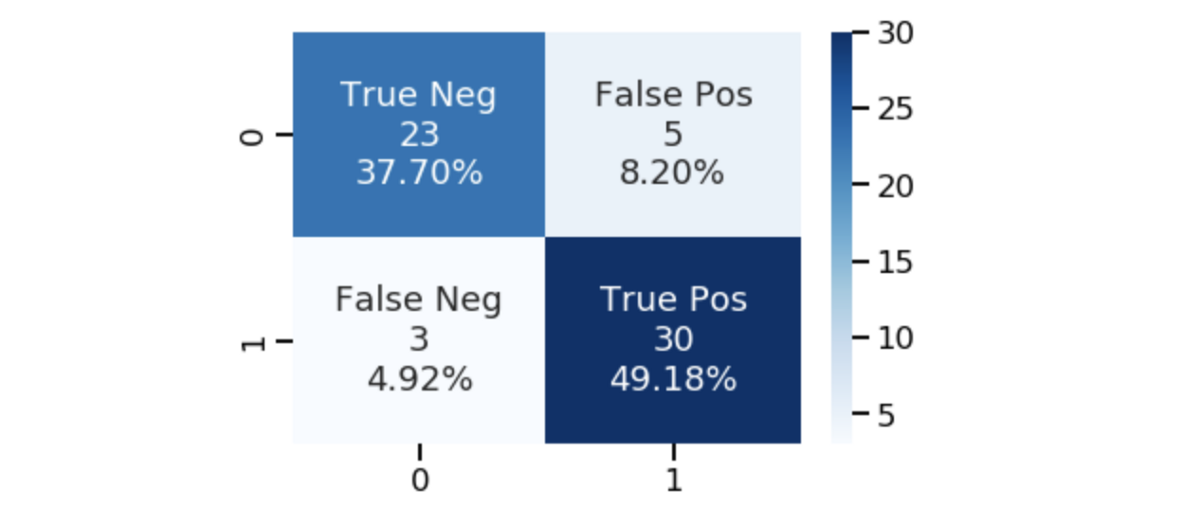

In [48]:
#importing libraries for evaluation
from sklearn.metrics import hamming_loss,accuracy_score,log_loss,f1_score
from sklearn.metrics import coverage_error,precision_score,label_ranking_average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.model_selection import cross_val_score

# Building model based on Heading of review

### 1) Power Transformation

### 1.1 Binary relevance with GuassianNb as base classifier

In [49]:
# using binary relevance
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB

# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
classifier1 = BinaryRelevance(GaussianNB())

# train
classifier1.fit(x_train, y_train)
# predict
predictions = classifier1.predict(x_test)

# accuracy
acc_br=accuracy_score(y_test,predictions)*100
print("Accuracy = ",acc_br)
#cross validation score
cv_br=cross_val_score(classifier1,x,y,cv=3).mean()*100
print("Cross validation score=",cv_br)
print("\n")

#log loss
loss_br=log_loss(y_test,predictions.toarray())
print("log loss=",loss_br)
#hamming loss
hamm_loss_br=hamming_loss(y_test,predictions)
print("hamming loss=",hamm_loss_br) 
print("\n")


#f1 score
f1_br=f1_score(y_test,predictions.toarray(),average='micro')
print("f1 score=",f1_br)
#precision score micro averaged
pre_br=precision_score(y_test,predictions.toarray(),average='micro')
print("average precision score=",pre_br)
#auc roc curve
auc_br=roc_auc_score(y_test,predictions.toarray())
print("AUC ROC score=",auc_br)
print("\n")


#label ranking 
lr_br=label_ranking_average_precision_score(y_test,predictions.toarray())
print("label ranking average precision score=",lr_br)
#coverage error
ce_br=coverage_error(y_test,predictions.toarray())
print("coverage area=",ce_br)
print("\n")

Accuracy =  31.57894736842105
Cross validation score= 29.33333333333333


log loss= 6.099015439373183
hamming loss= 0.33157894736842103


f1 score= 0.496
average precision score= 0.3563218390804598
AUC ROC score= 0.6202598334583629


label ranking average precision score= 0.5162280701754385
coverage area= 3.0526315789473686




In [50]:
#confusion matrix for binary relevance
conf_mat1=multilabel_confusion_matrix(y_test,predictions)
conf_mat1

array([[[21, 11],
        [ 0,  6]],

       [[23, 12],
        [ 2,  1]],

       [[24, 13],
        [ 1,  0]],

       [[15, 12],
        [ 1, 10]],

       [[13,  8],
        [ 3, 14]]])

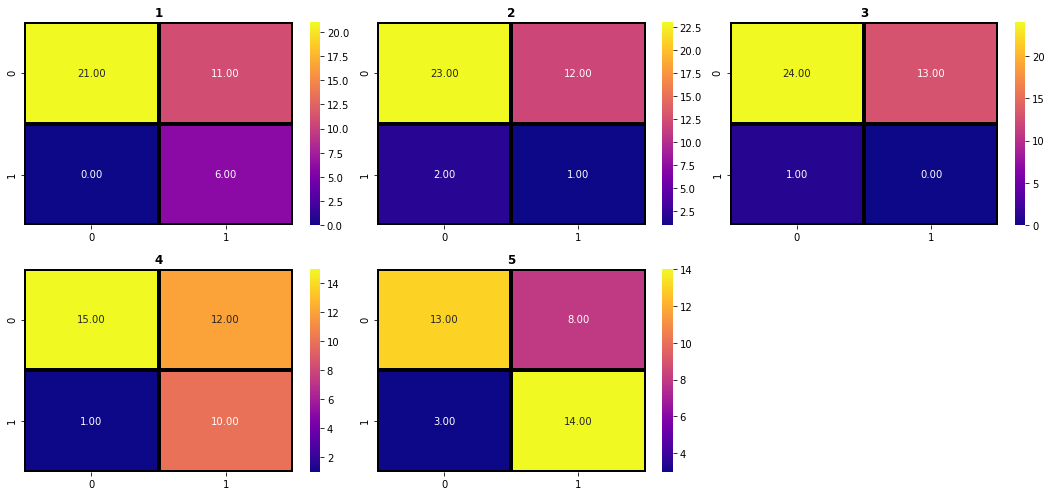

In [51]:
#plotting heatmap of confusion matrix
a = 2  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter
fig = plt.figure(figsize=(15,7))
for i in range(0,5):
    plt.subplot(a, b, c)
    plt.title('{}'.format(i+1),weight='bold')
    sns.heatmap(conf_mat1[i],annot=True,cmap='plasma',fmt="0.2f",linewidths=3,linecolor='black')
    c = c + 1
    plt.tight_layout()
plt.show()

### 1.2 Label powerset

In [52]:
#create and fit classifier
from skmultilearn.problem_transform import LabelPowerset
from sklearn.naive_bayes import GaussianNB

# initialize Label Powerset multi-label classifier
# with a gaussian naive bayes base classifier
classifier2 = LabelPowerset(GaussianNB())
classifier2.fit(x_train, y_train)
#predictions
predictions = classifier2.predict(x_test)

# accuracy
acc_lps=accuracy_score(y_test,predictions)*100
print("Accuracy = ",acc_lps)
#cross validation score
cv_lps=cross_val_score(classifier2,x,y,cv=3).mean()*100
print("Cross validation score=",cv_lps)
print("\n")

#log loss
loss_lps=log_loss(y_test,predictions.toarray())
print("log loss=",loss_lps)
#hamming loss
hamm_loss_lps=hamming_loss(y_test,predictions)
print("hamming loss=",hamm_loss_lps)
print("\n")

#auc roc score
auc_lps=roc_auc_score(y_test,predictions.toarray())
print("AUC ROC score=",auc_lps)
#f1 score
f1_lps=f1_score(y_test,predictions.toarray(),average='micro')
print("f1 score=",f1_lps)
#precision score micro averaged
pre_lps=precision_score(y_test,predictions.toarray(),average='micro')
print("average precision score=",pre_lps)
print("\n")

#coverage error
ce_lps=coverage_error(y_test,predictions.toarray())
print("coverage area=",ce_lps)
#label ranking 
lr_lps=label_ranking_average_precision_score(y_test,predictions.toarray())
print("label ranking average precision score=",lr_lps)

Accuracy =  39.473684210526315
Cross validation score= 40.666666666666664


log loss= 20.905048870603835
hamming loss= 0.24210526315789474


AUC ROC score= 0.5945128221231163
f1 score= 0.39473684210526316
average precision score= 0.39473684210526316


coverage area= 3.4210526315789473
label ranking average precision score= 0.5157894736842102


In [53]:
#confusion matrix for label powerset
conf_mat2=multilabel_confusion_matrix(y_test,predictions)
conf_mat2

array([[[29,  3],
        [ 1,  5]],

       [[32,  3],
        [ 3,  0]],

       [[23, 14],
        [ 1,  0]],

       [[24,  3],
        [ 5,  6]],

       [[21,  0],
        [13,  4]]])

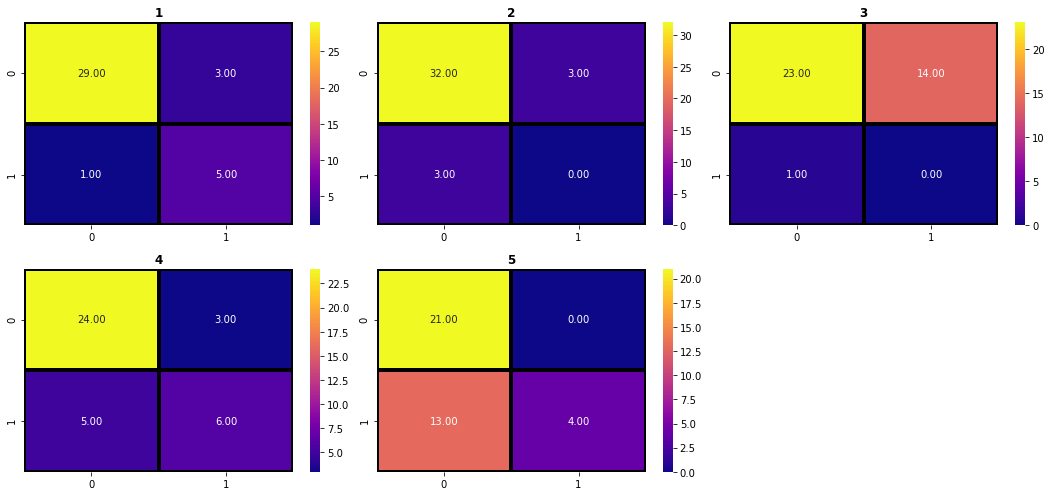

In [54]:
#plotting heatmap of confusion matrix
a = 2  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter
fig = plt.figure(figsize=(15,7))
for i in range(0,5): 
    plt.subplot(a, b, c)
    plt.title('{}'.format(i+1),weight='bold')
    sns.heatmap(conf_mat2[i],annot=True,cmap='plasma',fmt="0.2f",linewidths=3,linecolor='black')
    c = c + 1
    plt.tight_layout()
plt.show()

### 2 ) Classifier chain with MultinomialNB classifier (ensemble)

In [55]:
#create and fit classifier
from sklearn.naive_bayes import MultinomialNB
from skmultilearn.problem_transform import ClassifierChain
classifier3 = ClassifierChain(MultinomialNB())
classifier3.fit(x_train, y_train)

#predictions
predictions = classifier3.predict(x_test)
# accuracy
acc_cc=accuracy_score(y_test,predictions)*100
print("Accuracy = ",acc_cc)
#cross validation score
cv_cc=cross_val_score(classifier3,x,y,cv=3).mean()*100
print("Cross validation score=",cv_cc)
print("\n")

#log loss
loss_cc=log_loss(y_test,predictions.toarray())
print("log loss=",loss_cc)
#hamming loss
hamm_loss_cc=hamming_loss(y_test,predictions)
print("hamming loss=",hamm_loss_cc)
print("\n")

#auc roc score
auc_cc=roc_auc_score(y_test,predictions.toarray())
print("AUC ROC score=",auc_cc)
#f1 score
f1_cc=f1_score(y_test,predictions.toarray(),average='micro')
print("f1 score=",f1_cc)
#precision score micro averaged
pre_cc=precision_score(y_test,predictions.toarray(),average='micro')
print("average precision score=",pre_cc)
print("\n")

#coverage error
ce_cc=coverage_error(y_test,predictions.toarray())
print("coverage area=",ce_cc)

#label ranking 
lr_cc=label_ranking_average_precision_score(y_test,predictions.toarray())
print("label ranking average precision score=",lr_cc)

Accuracy =  21.052631578947366
Cross validation score= 17.333333333333336


log loss= 3.8702934952750736
hamming loss= 0.1736842105263158


AUC ROC score= 0.5559786414565826
f1 score= 0.32653061224489793
average precision score= 0.7272727272727273


coverage area= 4.157894736842105
label ranking average precision score= 0.3684210526315787


In [56]:
#confusion matrix for classifier chain
conf_mat3=multilabel_confusion_matrix(y_test,predictions)
conf_mat3

array([[[31,  1],
        [ 4,  2]],

       [[35,  0],
        [ 3,  0]],

       [[37,  0],
        [ 1,  0]],

       [[27,  0],
        [11,  0]],

       [[19,  2],
        [11,  6]]])

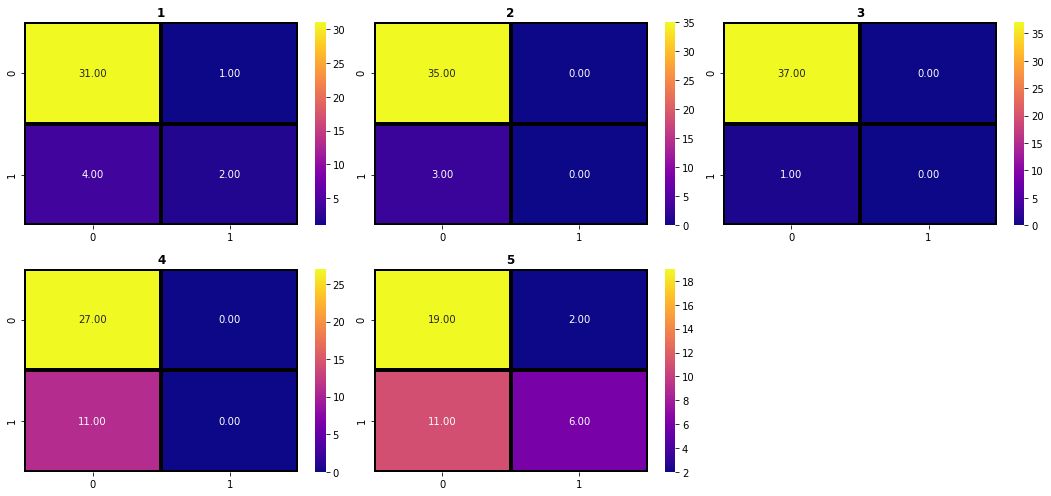

In [57]:
#plotting heatmap of confusion matrix
a = 2  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter
fig = plt.figure(figsize=(15,7))
for i in range(0,5): 
    plt.subplot(a, b, c)
    plt.title('{}'.format(i+1),weight='bold')
    sns.heatmap(conf_mat3[i],annot=True,cmap='plasma',fmt="0.2f",linewidths=3,linecolor='black')
    c = c + 1
    plt.tight_layout()
plt.show()

### 3) Adapted Algorithm
Adapted algorithm, as the name suggests, adapting the algorithm to directly perform multi-label classification, rather than transforming the problem into different subsets of problems.

For example, multi-label version of kNN is represented by MLkNN. So, let us quickly implement this on our randomly generated data set.

In [58]:
from skmultilearn.adapt import MLkNN
classifier4 = MLkNN(k=3)
# train
classifier4.fit(x_train, y_train.values)
#predictions
predictions = classifier4.predict(x_test)

# accuracy
acc_mlknn=accuracy_score(y_test,predictions)*100
print("Accuracy = ",acc_mlknn)
#cross validation score
cv_mlknn=cross_val_score(classifier4,x,y.values,cv=3).mean()*100
print("Cross validation score=",cv_mlknn)
print("\n")

#log loss
loss_mlknn=log_loss(y_test,predictions.toarray())
print("log loss=",loss_mlknn)
#hamming loss
hamm_loss_mlknn=hamming_loss(y_test,predictions)
print("hamming loss=",hamm_loss_mlknn)
print("\n")

#auc roc score
auc_mlknn=roc_auc_score(y_test,predictions.toarray())
print("AUC ROC score=",auc_mlknn)
#f1 score
f1_mlknn=f1_score(y_test,predictions.toarray(),average='micro')
print("f1 score=",f1_mlknn)
#precision score micro averaged
pre_mlknn=precision_score(y_test,predictions.toarray(),average='micro')
print("average precision score=",pre_mlknn)
print("\n")

#label ranking 
lr_mlknn=label_ranking_average_precision_score(y_test,predictions.toarray())
print("label ranking average precision score=",lr_mlknn)
#coverage error
ce_mlknn=coverage_error(y_test,predictions.toarray())
print("coverage area=",ce_mlknn)

Accuracy =  28.947368421052634
Cross validation score= 36.00000000000001


log loss= 8.942601841526582
hamming loss= 0.18947368421052632


AUC ROC score= 0.582759284303402
f1 score= 0.37931034482758624
average precision score= 0.55


label ranking average precision score= 0.43157894736842084
coverage area= 3.8421052631578947


In [59]:
#confusion matrix for mlknn
conf_mat4=multilabel_confusion_matrix(y_test,predictions)
conf_mat4

array([[[30,  2],
        [ 2,  4]],

       [[34,  1],
        [ 3,  0]],

       [[34,  3],
        [ 1,  0]],

       [[27,  0],
        [ 9,  2]],

       [[18,  3],
        [12,  5]]])

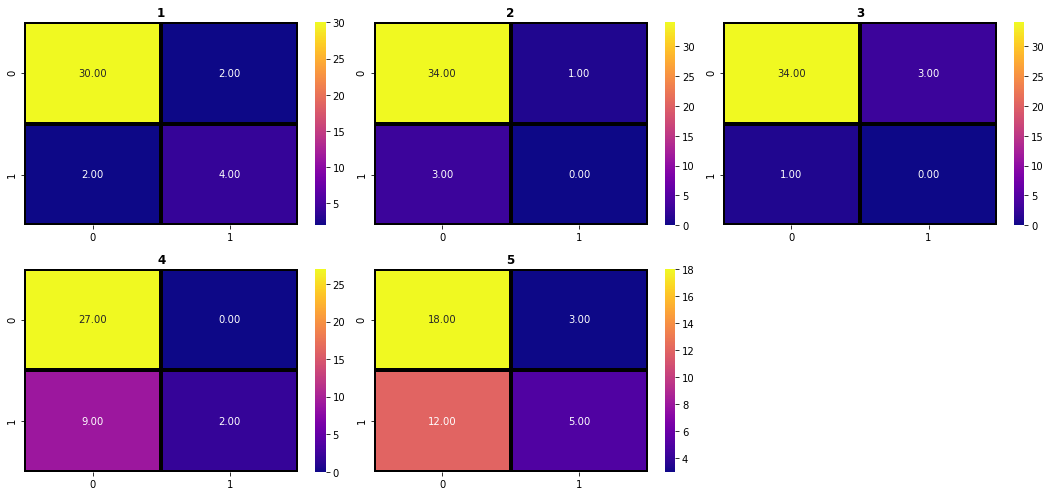

In [60]:
a = 2  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter
fig = plt.figure(figsize=(15,7))
for i in range(0,5): 
    plt.subplot(a, b, c)
    plt.title('{}'.format(i+1),weight='bold')
    sns.heatmap(conf_mat4[i],annot=True,cmap='plasma',fmt="0.2f",linewidths=3,linecolor='black')
    c = c + 1
    plt.tight_layout()
plt.show()

### Comparing all the models performance

In [61]:
#creating a comparision table for better understanding

df_comparison_heading=pd.DataFrame({
    "Model":['Binary Relevance',"Classifier chain","Label powerset","Adapted algorithm"],
    "Accuracy Score":[acc_br,acc_cc,acc_lps,acc_mlknn],
    "Cross Validation score":[cv_br,cv_cc,cv_lps,cv_mlknn],
    "Hamming Loss":[hamm_loss_br,hamm_loss_cc,hamm_loss_lps,hamm_loss_mlknn],
    "Log Loss":[loss_br,loss_cc,loss_lps,loss_mlknn],
    " Auc-Roc score":[auc_br,auc_cc,auc_lps,auc_mlknn],
    "F1 Score":[f1_br,f1_cc,f1_lps,f1_mlknn],
    "Precision":[pre_br,pre_cc,pre_lps,pre_mlknn],
    "coverage error":[ce_br,ce_cc,ce_lps,ce_mlknn],
    "Label ranking":[lr_br,lr_cc,lr_lps,lr_mlknn]})
    

df_comparison_heading.sort_values(by="Accuracy Score",ascending=False,ignore_index=True)

,Model,Accuracy Score,Cross Validation score,Hamming Loss,Log Loss,Auc-Roc score,F1 Score,Precision,coverage error,Label ranking
0,Label powerset,39.473684,40.666667,0.242105,20.905049,0.594513,0.394737,0.394737,3.421053,0.515789
1,Binary Relevance,31.578947,29.333333,0.331579,6.099015,0.620260,0.496000,0.356322,3.052632,0.516228
2,Adapted algorithm,28.947368,36.000000,0.189474,8.942602,0.582759,0.379310,0.550000,3.842105,0.431579
3,Classifier chain,21.052632,17.333333,0.173684,3.870293,0.555979,0.326531,0.727273,4.157895,0.368421


#### Conclusion:
* The hamming loss for Classifier Chain is the least among all.
* The log loss is least for Classifier Chain.
* The AUC ROC Score for Binary Relevance is maximum which is 0.62
* The accuracy score of Label Powerset is best out of 4 selected models.

# Building model based on actual reviews and evaluation of its performance

In [62]:
# Separation of Labels and Features
z = df['Review']
y = df[['1 Star','2 Star','3 Star','4 Star','5 Star']]

In [63]:
z.shape

(11324,)

In [64]:
y.shape

(11324, 5)

In [65]:
#transforming words to vectors
#initiate tfid
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()
#convert text into vectors
z = tf.fit_transform(z)

In [66]:
#splitting data into training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(z, y, test_size=0.25, random_state=123)

# 1) Power Transformation
# 1.1 Binary relevance with GuassianNb as base classifier

In [67]:
# using binary relevance
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB

# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
classifier1 = BinaryRelevance(GaussianNB())

# train
classifier1.fit(x_train, y_train)
# predict
predictions = classifier1.predict(x_test)

# accuracy
acc_br=accuracy_score(y_test,predictions)*100
print("Accuracy = ",acc_br)
#cross validation score
cv_br=cross_val_score(classifier1,z,y,cv=3).mean()*100
print("Cross validation score=",cv_br)
print("\n")

#log loss
loss_br=log_loss(y_test,predictions.toarray())
print("log loss=",loss_br)
#hamming loss
hamm_loss_br=hamming_loss(y_test,predictions)
print("hamming loss=",hamm_loss_br) 
print("\n")


#f1 score
f1_br=f1_score(y_test,predictions.toarray(),average='micro')
print("f1 score=",f1_br)
#precision score micro averaged
pre_br=precision_score(y_test,predictions.toarray(),average='micro')
print("average precision score=",pre_br)
#auc roc curve
auc_br=roc_auc_score(y_test,predictions.toarray())
print("AUC ROC score=",auc_br)
print("\n")


#label ranking 
lr_br=label_ranking_average_precision_score(y_test,predictions.toarray())
print("label ranking average precision score=",lr_br)
#coverage error
ce_br=coverage_error(y_test,predictions.toarray())
print("coverage area=",ce_br)
print("\n")

Accuracy =  6.923348640056518
Cross validation score= 6.455345099677006


log loss= 5.878204302930631
hamming loss= 0.5691275167785235


f1 score= 0.36845406083411725
average precision score= 0.2367758186397985
AUC ROC score= 0.532815971935535


label ranking average precision score= 0.2997586247498034
coverage area= 4.140233133168492




In [68]:
#confusion matrix for binary relevance
conf_mat1=multilabel_confusion_matrix(y_test,predictions)
conf_mat1

array([[[ 888, 1603],
        [  80,  260]],

       [[1316, 1382],
        [  60,   73]],

       [[ 758, 1786],
        [  86,  201]],

       [[ 448, 1713],
        [ 116,  554]],

       [[ 339, 1091],
        [ 139, 1262]]])

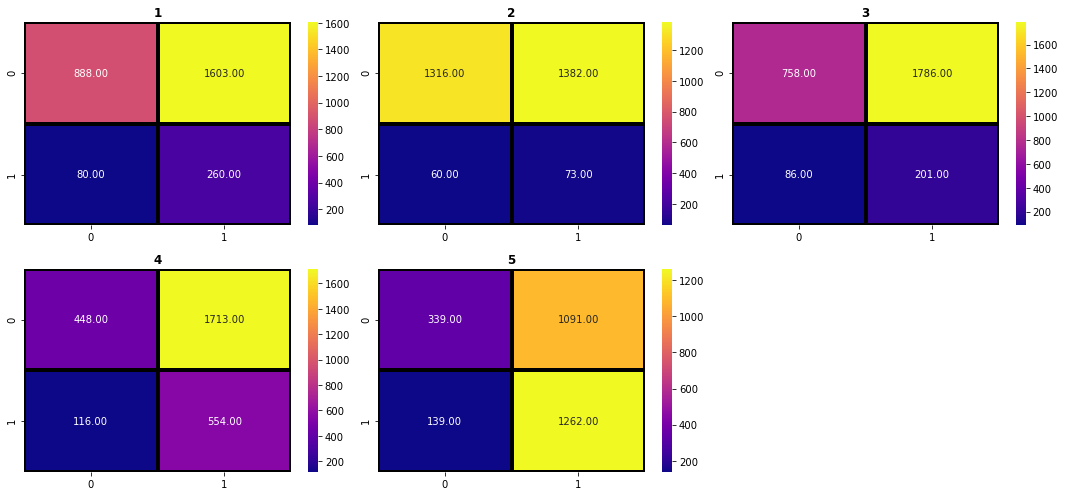

In [69]:
#plotting heatmap of confusion matrix
a = 2  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter
fig = plt.figure(figsize=(15,7))
for i in range(0,5):
    plt.subplot(a, b, c)
    plt.title('{}'.format(i+1),weight='bold')
    sns.heatmap(conf_mat1[i],annot=True,cmap='plasma',fmt="0.2f",linewidths=3,linecolor='black')
    c = c + 1
    plt.tight_layout()
plt.show()

# 1.2 Label powerset

In [70]:
#create and fit classifier
from skmultilearn.problem_transform import LabelPowerset
from sklearn.naive_bayes import GaussianNB

# initialize Label Powerset multi-label classifier
# with a gaussian naive bayes base classifier
classifier2 = LabelPowerset(GaussianNB())
classifier2.fit(x_train, y_train)
#predictions
predictions = classifier2.predict(x_test)

# accuracy
acc_lps=accuracy_score(y_test,predictions)*100
print("Accuracy = ",acc_lps)
#cross validation score
cv_lps=cross_val_score(classifier2,z,y,cv=3).mean()*100
print("Cross validation score=",cv_lps)
print("\n")

#log loss
loss_lps=log_loss(y_test,predictions.toarray())
print("log loss=",loss_lps)
#hamming loss
hamm_loss_lps=hamming_loss(y_test,predictions)
print("hamming loss=",hamm_loss_lps)
print("\n")

#auc roc score
auc_lps=roc_auc_score(y_test,predictions.toarray())
print("AUC ROC score=",auc_lps)
#f1 score
f1_lps=f1_score(y_test,predictions.toarray(),average='micro')
print("f1 score=",f1_lps)
#precision score micro averaged
pre_lps=precision_score(y_test,predictions.toarray(),average='micro')
print("average precision score=",pre_lps)
print("\n")

#coverage error
ce_lps=coverage_error(y_test,predictions.toarray())
print("coverage area=",ce_lps)
#label ranking 
lr_lps=label_ranking_average_precision_score(y_test,predictions.toarray())
print("label ranking average precision score=",lr_lps)

Accuracy =  14.76510067114094
Cross validation score= 15.144884658714034


log loss= 29.43909128962187
hamming loss= 0.3409395973154362


AUC ROC score= 0.5158057539313053
f1 score= 0.1476510067114094
average precision score= 0.1476510067114094


coverage area= 4.409395973154362
label ranking average precision score= 0.3181208053691403


In [71]:
#confusion matrix for label powerset
conf_mat2=multilabel_confusion_matrix(y_test,predictions)
conf_mat2

array([[[2328,  163],
        [ 267,   73]],

       [[1362, 1336],
        [  61,   72]],

       [[1958,  586],
        [ 247,   40]],

       [[1951,  210],
        [ 584,   86]],

       [[1312,  118],
        [1254,  147]]])

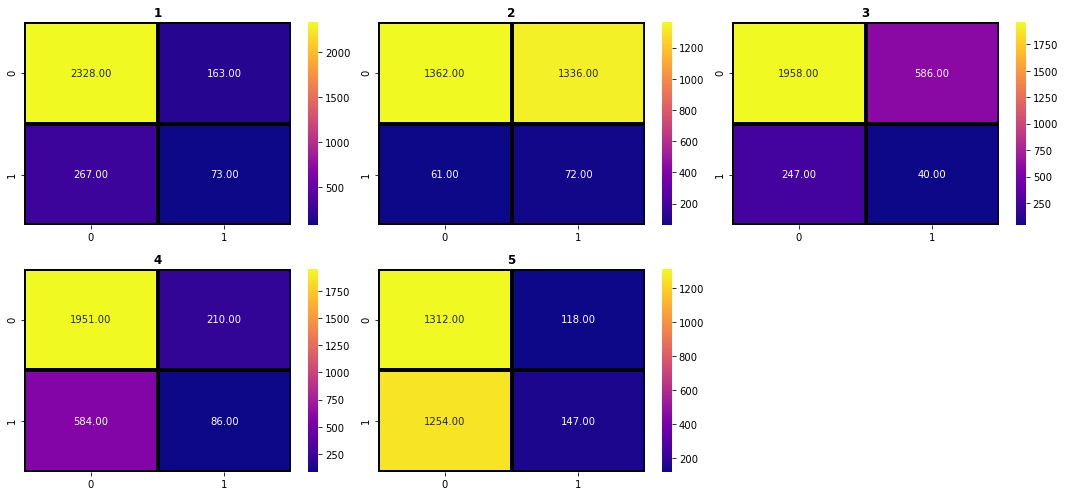

In [72]:
#plotting heatmap of confusion matrix
a = 2  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter
fig = plt.figure(figsize=(15,7))
for i in range(0,5): 
    plt.subplot(a, b, c)
    plt.title('{}'.format(i+1),weight='bold')
    sns.heatmap(conf_mat2[i],annot=True,cmap='plasma',fmt="0.2f",linewidths=3,linecolor='black')
    c = c + 1
    plt.tight_layout()
plt.show()

# 2 ) Classifier chain with MultinomialNB classifier (ensemble)

In [73]:
#create and fit classifier
from sklearn.naive_bayes import MultinomialNB
from skmultilearn.problem_transform import ClassifierChain
classifier3 = ClassifierChain(MultinomialNB())
classifier3.fit(x_train, y_train)

#predictions
predictions = classifier3.predict(x_test)
# accuracy
acc_cc=accuracy_score(y_test,predictions)*100
print("Accuracy = ",acc_cc)
#cross validation score
cv_cc=cross_val_score(classifier3,z,y,cv=3).mean()*100
print("Cross validation score=",cv_cc)
print("\n")

#log loss
loss_cc=log_loss(y_test,predictions.toarray())
print("log loss=",loss_cc)
#hamming loss
hamm_loss_cc=hamming_loss(y_test,predictions)
print("hamming loss=",hamm_loss_cc)
print("\n")

#auc roc score
auc_cc=roc_auc_score(y_test,predictions.toarray())
print("AUC ROC score=",auc_cc)
#f1 score
f1_cc=f1_score(y_test,predictions.toarray(),average='micro')
print("f1 score=",f1_cc)
#precision score micro averaged
pre_cc=precision_score(y_test,predictions.toarray(),average='micro')
print("average precision score=",pre_cc)
print("\n")

#coverage error
ce_cc=coverage_error(y_test,predictions.toarray())
print("coverage area=",ce_cc)

#label ranking 
lr_cc=label_ranking_average_precision_score(y_test,predictions.toarray())
print("label ranking average precision score=",lr_cc)

Accuracy =  47.12115860120099
Cross validation score= 46.547164226946066


log loss= 9.365455430620528
hamming loss= 0.15747085835393854


AUC ROC score= 0.5490725081273565
f1 score= 0.5448233612415766
average precision score= 0.6456921587608906


coverage area= 3.1151536559519606
label ranking average precision score= 0.5769692688096231


In [74]:
#confusion matrix for classifier chain
conf_mat3=multilabel_confusion_matrix(y_test,predictions)
conf_mat3

array([[[2485,    6],
        [ 321,   19]],

       [[2698,    0],
        [ 133,    0]],

       [[2544,    0],
        [ 287,    0]],

       [[2154,    7],
        [ 664,    6]],

       [[ 711,  719],
        [  92, 1309]]])

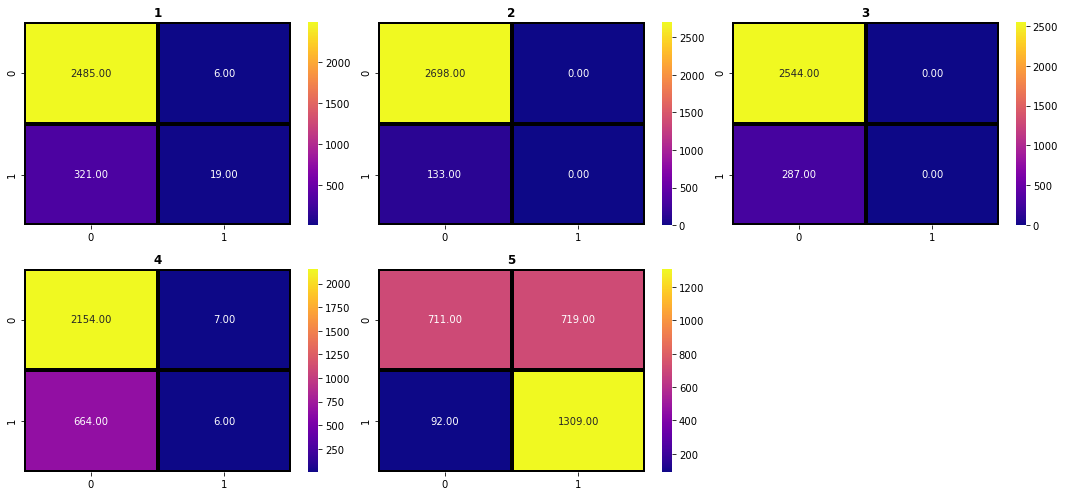

In [75]:
#plotting heatmap of confusion matrix
a = 2  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter
fig = plt.figure(figsize=(15,7))
for i in range(0,5): 
    plt.subplot(a, b, c)
    plt.title('{}'.format(i+1),weight='bold')
    sns.heatmap(conf_mat3[i],annot=True,cmap='plasma',fmt="0.2f",linewidths=3,linecolor='black')
    c = c + 1
    plt.tight_layout()
plt.show()

# 3) Adapted Algorithm

In [76]:
from skmultilearn.adapt import MLkNN
classifier4 = MLkNN(k=3)
# train
classifier4.fit(x_train, y_train.values)
#predictions
predictions = classifier4.predict(x_test)

# accuracy
acc_mlknn=accuracy_score(y_test,predictions)*100
print("Accuracy = ",acc_mlknn)
#cross validation score
cv_mlknn=cross_val_score(classifier4,z,y.values,cv=3).mean()*100
print("Cross validation score=",cv_mlknn)
print("\n")

#log loss
loss_mlknn=log_loss(y_test,predictions.toarray())
print("log loss=",loss_mlknn)
#hamming loss
hamm_loss_mlknn=hamming_loss(y_test,predictions)
print("hamming loss=",hamm_loss_mlknn)
print("\n")

#auc roc score
auc_mlknn=roc_auc_score(y_test,predictions.toarray())
print("AUC ROC score=",auc_mlknn)
#f1 score
f1_mlknn=f1_score(y_test,predictions.toarray(),average='micro')
print("f1 score=",f1_mlknn)
#precision score micro averaged
pre_mlknn=precision_score(y_test,predictions.toarray(),average='micro')
print("average precision score=",pre_mlknn)
print("\n")

#label ranking 
lr_mlknn=label_ranking_average_precision_score(y_test,predictions.toarray())
print("label ranking average precision score=",lr_mlknn)
#coverage error
ce_mlknn=coverage_error(y_test,predictions.toarray())
print("coverage area=",ce_mlknn)

Accuracy =  25.07947721653126
Cross validation score= 40.82424535950053


log loss= 12.846690994297392
hamming loss= 0.2256446485340869


AUC ROC score= 0.559819484324664
f1 score= 0.3258758970029548
average precision score= 0.40482433141059254


label ranking average precision score= 0.40720593429884927
coverage area= 3.9311197456729072


In [77]:
#confusion matrix for mlknn
conf_mat4=multilabel_confusion_matrix(y_test,predictions)
conf_mat4

array([[[2272,  219],
        [ 199,  141]],

       [[2676,   22],
        [ 128,    5]],

       [[2479,   65],
        [ 262,   25]],

       [[1515,  646],
        [ 441,  229]],

       [[1247,  183],
        [1029,  372]]])

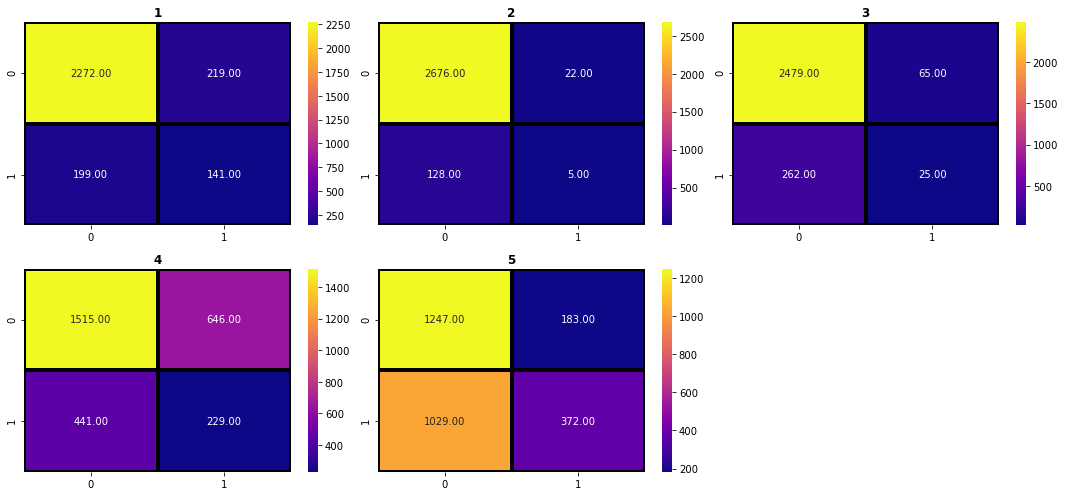

In [78]:
a = 2  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter
fig = plt.figure(figsize=(15,7))
for i in range(0,5): 
    plt.subplot(a, b, c)
    plt.title('{}'.format(i+1),weight='bold')
    sns.heatmap(conf_mat4[i],annot=True,cmap='plasma',fmt="0.2f",linewidths=3,linecolor='black')
    c = c + 1
    plt.tight_layout()
plt.show()
  

# Comparing all the models performance

In [79]:
#creating a comparision table for better understanding

df_comparison_review=pd.DataFrame({
    "Model":['Binary Relevance',"Classifier chain","Label powerset","Adapted algorithm"],
    "Accuracy Score":[acc_br,acc_cc,acc_lps,acc_mlknn],
    "Cross Validation score":[cv_br,cv_cc,cv_lps,cv_mlknn],
    "Hamming Loss":[hamm_loss_br,hamm_loss_cc,hamm_loss_lps,hamm_loss_mlknn],
    "Log Loss":[loss_br,loss_cc,loss_lps,loss_mlknn],
    " Auc-Roc score":[auc_br,auc_cc,auc_lps,auc_mlknn],
    "F1 Score":[f1_br,f1_cc,f1_lps,f1_mlknn],
    "Precision":[pre_br,pre_cc,pre_lps,pre_mlknn],
    "coverage error":[ce_br,ce_cc,ce_lps,ce_mlknn],
    "Label ranking":[lr_br,lr_cc,lr_lps,lr_mlknn]})
    

df_comparison_review.sort_values(by="Accuracy Score",ascending=False,ignore_index=True)

,Model,Accuracy Score,Cross Validation score,Hamming Loss,Log Loss,Auc-Roc score,F1 Score,Precision,coverage error,Label ranking
0,Classifier chain,47.121159,46.547164,0.157471,9.365455,0.549073,0.544823,0.645692,3.115154,0.576969
1,Adapted algorithm,25.079477,40.824245,0.225645,12.846691,0.559819,0.325876,0.404824,3.931120,0.407206
2,Label powerset,14.765101,15.144885,0.340940,29.439091,0.515806,0.147651,0.147651,4.409396,0.318121
3,Binary Relevance,6.923349,6.455345,0.569128,5.878204,0.532816,0.368454,0.236776,4.140233,0.299759


#### Conclusion:
* The hamming loss for Classifier Chain is the least among all.
* The log loss is least for Binary Relevance.
* The AUC ROC Score for Adapted Algorithm is maximum which is 0.56
* The accuracy score of Classifier Chain is best out of 4 selected models.

# Comparison of Model performance for heading and review

In [80]:
df_comparison_heading['Data']='Heading'
df_comparison_review['Data']='Review'
df_merged=pd.concat([df_comparison_heading,df_comparison_review])
df_merged

,Model,Accuracy Score,Cross Validation score,Hamming Loss,Log Loss,Auc-Roc score,F1 Score,Precision,coverage error,Label ranking,Data
0,Binary Relevance,31.578947,29.333333,0.331579,6.099015,0.620260,0.496000,0.356322,3.052632,0.516228,Heading
1,Classifier chain,21.052632,17.333333,0.173684,3.870293,0.555979,0.326531,0.727273,4.157895,0.368421,Heading
2,Label powerset,39.473684,40.666667,0.242105,20.905049,0.594513,0.394737,0.394737,3.421053,0.515789,Heading
3,Adapted algorithm,28.947368,36.000000,0.189474,8.942602,0.582759,0.379310,0.550000,3.842105,0.431579,Heading
0,Binary Relevance,6.923349,6.455345,0.569128,5.878204,0.532816,0.368454,0.236776,4.140233,0.299759,Review
1,Classifier chain,47.121159,46.547164,0.157471,9.365455,0.549073,0.544823,0.645692,3.115154,0.576969,Review
2,Label powerset,14.765101,15.144885,0.340940,29.439091,0.515806,0.147651,0.147651,4.409396,0.318121,Review
3,Adapted algorithm,25.079477,40.824245,0.225645,12.846691,0.559819,0.325876,0.404824,3.931120,0.407206,Review


#### Conclusion:
* The hamming loss by Classifier Chain is the least both for heading of reviews and reviews.
* The log loss is least by Clasifier Chain for heading of reviews and Binary Relevance for reviews. 
* The AUC ROC Score by Binary Relevanve is maximum for heading and by Adapted Algorithm for reviews.
* The accuracy score of Label Powerset is best for heading and Classifier Chain for reviews

# Saving Best Model

# saving classifier chain as our best model
import pickle
filename="Review_Classification_Laptop_Model.pkl"
pickle.dump(classifier3,open(filename,'wb'))